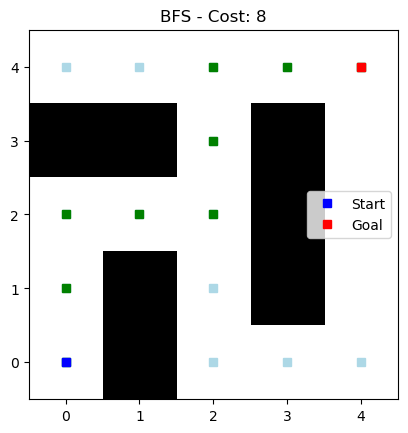

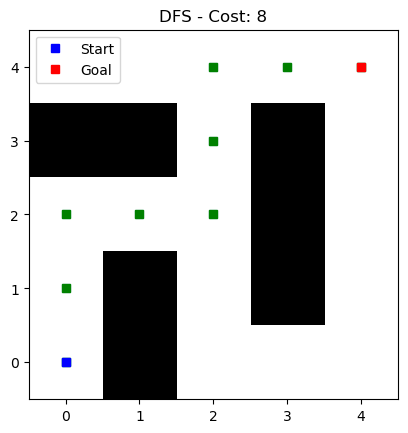

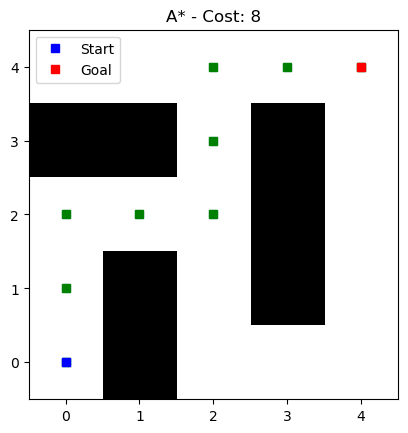

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import heapq

# Directions: up, down, left, right This line defines the 4 possible directions an agent can move on a 2D grid:
#(-1, 0) — move one row up, (1, 0) — move one row down,(0, -1) — move one column left,(0, 1) — move one column right
DIRS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

#This function checks whether a cell (r, c) Within grid bounds, Free to move into (i.e., not a wall)
def is_valid(grid, r, c):
    return 0 <= r < len(grid) and 0 <= c < len(grid[0]) and grid[r][c] == 0

#This function reconstructs the path from the start to goal using a dictionary called came_from. {node: previous_node} that stores where each node came from.
#end: the goal node
def reconstruct_path(came_from, end):
    path = []
    while end:
        path.append(end)
        end = came_from[end]
    return path[::-1]

def bfs(grid, start, goal):
    queue = deque([start])
    came_from = {start: None}
    explored = set()

    while queue:
        current = queue.popleft()
        explored.add(current)

        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(path)-1, explored

        for dr, dc in DIRS:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            if is_valid(grid, nr, nc) and neighbor not in came_from:
                queue.append(neighbor)
                came_from[neighbor] = current
    return [], 0, explored

def dfs(grid, start, goal):
    stack = [start]
    came_from = {start: None}
    explored = set()

    while stack:
        current = stack.pop()
        explored.add(current)

        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(path)-1, explored

        for dr, dc in DIRS:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            if is_valid(grid, nr, nc) and neighbor not in came_from:
                stack.append(neighbor)
                came_from[neighbor] = current
    return [], 0, explored

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan Distance

def astar(grid, start, goal):
    heap = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}
    explored = set()

    while heap:
        _, current = heapq.heappop(heap)
        explored.add(current)

        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, cost_so_far[goal], explored

        for dr, dc in DIRS:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            if is_valid(grid, nr, nc):
                new_cost = cost_so_far[current] + 1
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic(neighbor, goal)
                    heapq.heappush(heap, (priority, neighbor))
                    came_from[neighbor] = current
    return [], 0, explored

def draw_grid(grid, path, explored, start, goal, title):
    grid = np.array(grid)
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='Greys')

    for r, c in explored:
        ax.plot(c, r, 's', color='lightblue')

    for r, c in path:
        ax.plot(c, r, 's', color='green')

    ax.plot(start[1], start[0], 's', color='blue', label='Start')
    ax.plot(goal[1], goal[0], 's', color='red', label='Goal')
    ax.set_title(title)
    ax.legend()
    plt.gca().invert_yaxis()
    plt.show()

# Example Maze: 0 = free, 1 = wall
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

# Run BFS
path, cost, explored = bfs(maze, start, goal)
draw_grid(maze, path, explored, start, goal, f"BFS - Cost: {cost}")

# Run DFS
path, cost, explored = dfs(maze, start, goal)
draw_grid(maze, path, explored, start, goal, f"DFS - Cost: {cost}")

# Run A*
path, cost, explored = astar(maze, start, goal)
draw_grid(maze, path, explored, start, goal, f"A* - Cost: {cost}")
